Thresholding is a technique in OpenCV, which is the assignment of pixel values in relation to the threshold value provided. In thresholding, each pixel value is compared with the threshold value. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255). Thresholding is a very popular segmentation technique, used for separating an object considered as a foreground from its background. A threshold is a value which has two regions on its either side i.e. below the threshold or above the threshold.
In Computer Vision, this technique of thresholding is done on grayscale images. So initially, the image has to be converted in grayscale color space.

```
If f (x, y) < T
   then f (x, y) = 0
else
   f (x, y) = 255
where
f (x, y) = Coordinate Pixel Value
T = Threshold Value.
```
- cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)
 -- source --> imge source must be grayscale.
thresholdValue --> value of threshold below or above which pixel values will change accordingly.
maxVal --> Maximum value that can be assigned to a pixel.
thresholdingTechnique --> THe type of thresholding to be applied.

Simple Thresholding

- cv2.THRESH_BINARY: If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).
- cv2.THRESH_BINARY_INV: Inverted or Opposite case of cv2.THRESH_BINARY.
- cv.THRESH_TRUNC: If pixel intensity value is greater than threshold, it is truncated to the threshold. The pixel values are set to be the same as the threshold. All other values remain the same.
- cv.THRESH_TOZERO: Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.
- cv.THRESH_TOZERO_INV: Inverted or Opposite case of cv2.THRESH_TOZERO.

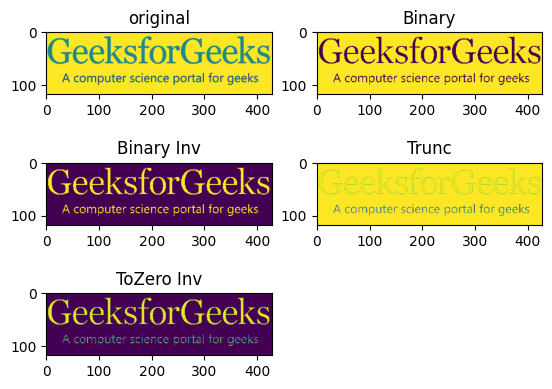

(None,)

In [1]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('img_6.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(rgb, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(rgb, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(rgb, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(rgb, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold (rgb, 120, 255, cv2.THRESH_TOZERO_INV)

plt.subplot(321), plt.imshow(rgb), plt.title('original')
plt.subplot(322), plt.imshow(thresh1), plt.title('Binary')
plt.subplot(323), plt.imshow(thresh2), plt.title('Binary Inv')
plt.subplot(324), plt.imshow(thresh3), plt.title('Trunc')
plt.subplot(325), plt.imshow(thresh4), plt.title('ToZero')
plt.subplot(325), plt.imshow(thresh5), plt.title('ToZero Inv')
plt.show(),

# Adaptive Thresholding
Prerequisite: Simple Thresholding using OpenCV In the previous post, Simple Thresholding was explained with different types of thresholding techniques. Another Thresholding technique is **Adaptive Thresholding**. In Simple Thresholding, a global value of a threshold was used which remained constant throughout. So, a constant threshold value won't help in the case of variable lighting conditions in different areas. **Adaptive thresholding** is the method where the threshold value is calculated for **smaller regions**. This leads to different threshold values for different regions with respect to the change in lighting. We use **cv2.adaptiveThreshold** for this.

##  Syntax: cv2.adaptiveThreshold(source, maxVal, adaptiveMethod, thresholdType, blocksize, constant)

Parameters:<br>
→ **source:** Input Image array (Single-channel, 8-bit or floating-point)<br>
→ **maxVal:** Maximum value that can be assigned to a pixel.<br>
→ **adaptiveMethod:** Adaptive method decides how threshold value is calculated.<br>

 **cv2.ADAPTIVE_THRESH_MEAN_C:**<br>
 **Threshold Value** = (Mean of the neighborhood area values—constant value). In other words, it is the mean of the **blockSize×blockSize** neighborhood of a point minus constant.<br>

**cv2.ADAPTIVE_THRESH_GAUSSIAN_C:**<br>
**Threshold Value** = (Gaussian-weighted sum of the neighborhood values—constant value). In other words, it is a weighted sum of the **blockSize×blockSize** neighborhood of a **point minus constant**.<br>

→ **thresholdType:** The type of thresholding to be applied.<br>
→ **blockSize:** Size of a pixel neighborhood that is used to calculate a threshold value.<br>
→ **constant:** A constant value that is subtracted from the **mean or weighted sum of the neighborhood pixels.**<br>

🧠 What is Otsu’s Thresholding?

Otsu's method automatically calculates an optimal global threshold value by analyzing the histogram of an image. It works best when the image histogram has two distinct peaks (bimodal), which represent foreground and background.

Otsu finds the threshold that minimizes the intra-class variance (within-class spread) and maximizes inter-class variance (between the two classes: foreground and background).

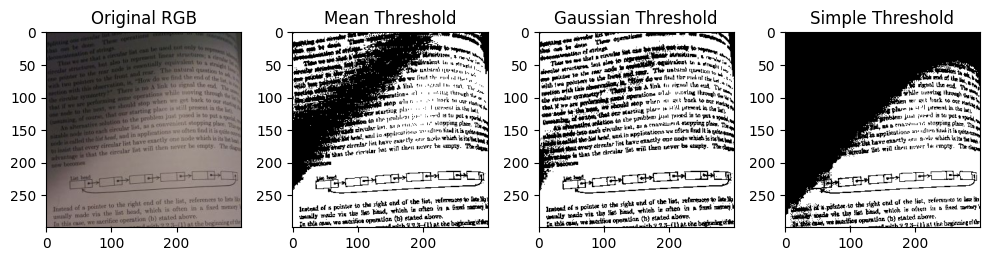

In [6]:
import cv2
from matplotlib import pyplot as plt

# Read image
image = cv2.imread('img_7.png')

# Convert to RGB for displaying with matplotlib
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to Grayscale for adaptive thresholding
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Adaptive Thresholding (Mean and Gaussian)
mean_threshold = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                       cv2.THRESH_BINARY, 199, 5)

gaussian_threshold = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                           cv2.THRESH_BINARY, 199, 5)

ret, simple_threshold = cv2.threshold(gray_img, 120, 255, cv2.THRESH_BINARY)

# Display the images
plt.figure(figsize=(10, 6))
plt.subplot(141), plt.imshow(rgb_img), plt.title('Original RGB')
plt.subplot(142), plt.imshow(mean_threshold, cmap='gray'), plt.title('Mean Threshold')
plt.subplot(143), plt.imshow(gaussian_threshold, cmap='gray'), plt.title('Gaussian Threshold')
plt.subplot(144), plt.imshow(simple_threshold, cmap='gray'), plt.title('Simple Threshold')
plt.tight_layout()
plt.show()


## Otsu Thresholding

In Otsu Thresholding, the value of the threshold isn't chosen but is determined automatically. A bimodal image (two distinct image values) is considered. The histogram generated contains two peaks. So, a generic condition would be to choose a threshold value that lies in the middle of both the histogram peak values. We use the Traditional cv2.threshold function and use cv2.THRESH_OTSU as an extra flag.

## Syntax: cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)

**Parameters:** <br>
**→ source:** Input Image array (must be in Grayscale).<br>
**→ thresholdValue:** Value of Threshold below and above which pixel values will change accordingly.<br>
**→ maxVal:** Maximum value that can be assigned to a pixel.<br>
**→ thresholdingTechnique:** The type of thresholding to be applied.<br>


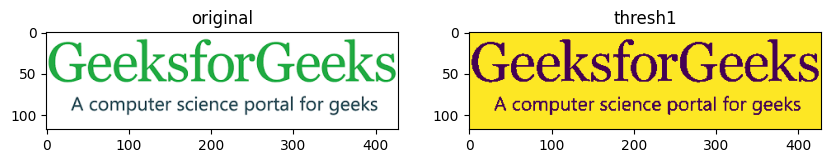

In [12]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('img_6.png')
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)

ret, thresh1 = cv2.threshold(gray_img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(rgb_img), plt.title('original')
plt.subplot(122), plt.imshow(thresh1), plt.title('thresh1')
plt.show()